In [1]:
# Groundtruth file

# Notebook used to generate the ground truth according to the position of prisms in post-process.

In [2]:
import sys
#!{sys.executable} -m pip install seaborn
#!{sys.executable} -m pip install pycryptodome
#!{sys.executable} -m pip install pycryptodomex
#!{sys.executable} -m pip install gnupg
import numpy as np
import importlib
import matplotlib.pyplot as plt
import scripts.theodolite_function as tfu
tfu = importlib.reload(tfu)
from scipy.interpolate import splprep, splev
from scipy import interpolate
import seaborn as sns
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from scipy.spatial.transform import Rotation as R
import scripts.theodolite_utils as ttfu

Failed to load Python extension for LZ4 support. LZ4 compression will not be available.


In [14]:
ttfu = importlib.reload(ttfu)
path = "./data/prediction/TS/20220523/"
prefix = "nr_trimble"
P1 = ttfu.read_prediction_data_csv_file(path+prefix +"_1.csv")
P2 = ttfu.read_prediction_data_csv_file(path+prefix +"_2.csv")
P3 = ttfu.read_prediction_data_csv_file(path+prefix +"_3.csv")

IndexError: list index out of range

In [3]:
ttfu = importlib.reload(ttfu)
path = "./data/prediction/TS/20220505_cones/corrected/"
prefix = "nr_trimble"
P1 = ttfu.read_prediction_data_resection_csv_file(path+prefix +"_1.csv")
P2 = ttfu.read_prediction_data_resection_csv_file(path+prefix +"_2.csv")
P3 = ttfu.read_prediction_data_resection_csv_file(path+prefix +"_3.csv")

In [4]:
P = np.array([[-0.3926683261421169, -0.06981451458695287, 0.37458416859960275,  1.],
            [-0.6480596685770119, -0.11178020130204336, 0.0936504044016776,  1.],
            [-0.6413256219354304, 0.14408137810898047, 0.07735247913826593,  1.]]).T

In [5]:
# Doing a minimization between these not moving points, and the 3D prism coordinates
# Pose_lidar is a list of each rigid transform founded
list_lidar_time = []
Pose_lidar = []
Prism_corrected = []
number = len(P1)
for i in range(0,number):
    Q = np.array([P1[i,1:4], P2[i,1:4], P3[i,1:4]]).T
    Q =np.concatenate((Q, np.array([[1,1,1]])), axis=0)
    T = ttfu.point_to_point_minimization(P, Q)
    Pose_lidar.append(T)
    prism_correct = T@P
    Prism_corrected.append(prism_correct)
    list_lidar_time.append(P1[i,0])

In [6]:
Pose_lidar_arr = np.array(Pose_lidar)
Prism_corrected_arr = np.array(Prism_corrected)
print(Pose_lidar_arr[:,0,3])
print(Prism_corrected[0][:,0])

[ -1.17776958  -1.25157696  -1.33960131 ... -78.32768428 -78.31276701
 -78.27564777]
[-1.64354749  1.12459131 -0.56803965  1.        ]


<IPython.core.display.Javascript object>


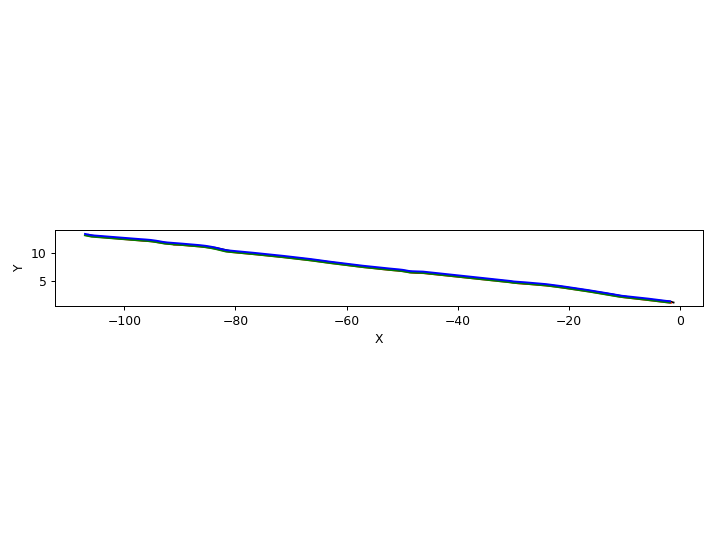

In [7]:
%matplotlib notebook
fig = plt.figure(figsize = (8, 6))
ax = plt.axes()
ax.plot(Pose_lidar_arr[0:400,0,3],Pose_lidar_arr[0:400,1,3], color='black')
ax.plot(Prism_corrected_arr[0:400,0,0],Prism_corrected_arr[0:400,1,0], color='red')
ax.plot(Prism_corrected_arr[0:400,0,1],Prism_corrected_arr[0:400,1,1], color='green')
ax.plot(Prism_corrected_arr[0:400,0,2],Prism_corrected_arr[0:400,1,2], color='blue')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_aspect('equal')
fig.tight_layout() 

<IPython.core.display.Javascript object>


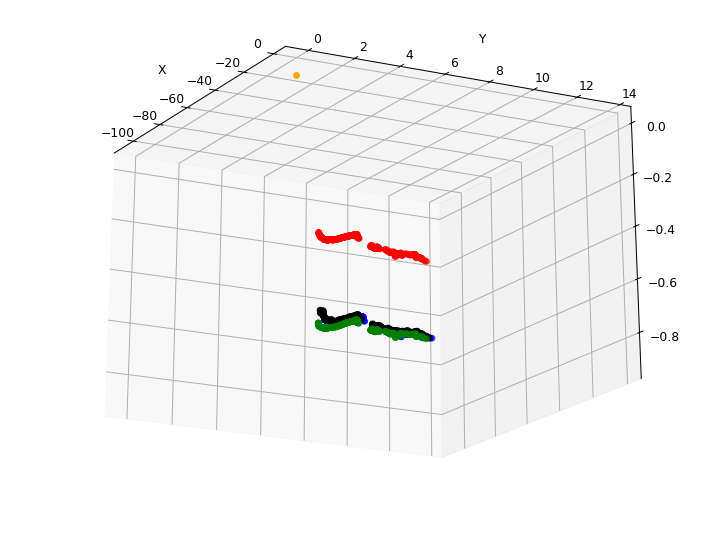

In [8]:
%matplotlib notebook
fig = plt.figure(figsize = (8, 6))
ax = plt.axes(projection ="3d")
ax.scatter3D(Pose_lidar_arr[0:400,0,3],Pose_lidar_arr[0:400,1,3],Pose_lidar_arr[0:400,2,3], color='black')
ax.scatter3D(Prism_corrected_arr[0:400,0,0],Prism_corrected_arr[0:400,1,0],Prism_corrected_arr[0:400,2,0], color='red')
ax.scatter3D(Prism_corrected_arr[0:400,0,1],Prism_corrected_arr[0:400,1,1],Prism_corrected_arr[0:400,2,1], color='green')
ax.scatter3D(Prism_corrected_arr[0:400,0,2],Prism_corrected_arr[0:400,1,2],Prism_corrected_arr[0:400,2,2], color='blue')
ax.scatter3D(0,0,0, color='orange')
ax.set_xlabel("X")
ax.set_ylabel("Y")
fig.tight_layout()

<IPython.core.display.Javascript object>


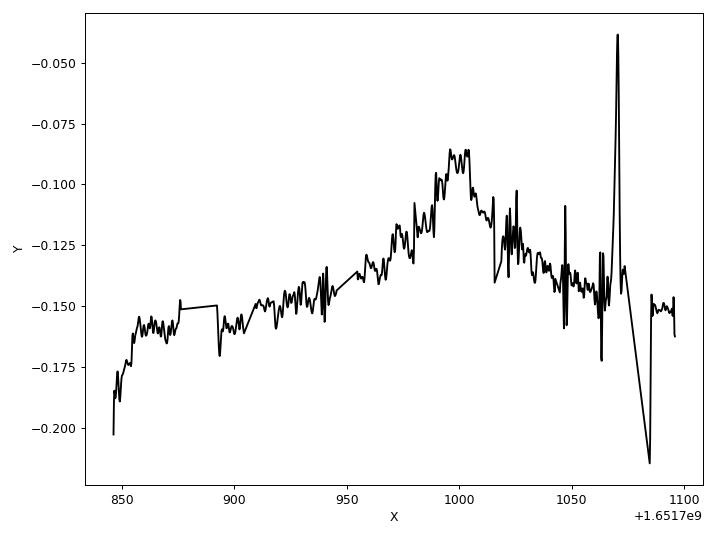

In [9]:
%matplotlib notebook
fig = plt.figure(figsize = (8, 6))
ax = plt.axes()
ax.plot(list_lidar_time,Pose_lidar_arr[:,0,2], color='black')
ax.set_xlabel("X")
ax.set_ylabel("Y")
fig.tight_layout() 

In [11]:
ttfu = importlib.reload(ttfu)
output = "./data/groundtruth/20220505_cones/"
file_name = "20220505_cones_marmotte_groundtruth.txt"
ttfu.grountruth_GP_convert_for_eval(list_lidar_time, Pose_lidar, output+file_name)

Conversion done !
